In [1]:
import numpy as np

In [31]:
def stochastic_rounding(x):
    # takes the integer part of the number
    x_int = x.astype(np.int32)
    # takes the fractional part
    x_frac = np.abs(x - x_int)

    # generate a random number
    rng = np.random.random(x_int.shape)

    # if the frac is grater... for positive cases
    rounded_pos = np.where(x_frac > rng, x_int + 1, x_int)

    # if the grac is greate... for negative cases
    rounded_neg = np.where(x_frac > rng, x_int - 1, x_int)

    # select the rounded according to the signal
    rounded = np.where(x < 0, rounded_neg, rounded_pos)
    
    return rounded

x = np.random.normal(0, 5, (5)) 
print("float ", x)
rx = 0
it = 100
for _ in range(it):
    rx += stochastic_rounding(x)

rx = rx.astype(np.float32) / it
print("stchr0", stochastic_rounding(x))
print("stchr1", rx)
print("round ", np.around(x).astype(np.int32))

float  [-0.48258947 -3.86155407 -4.33059497  0.90803504  2.04289916]
stchr0 [-1 -4 -5  1  3]
stchr1 [-0.46 -3.89 -4.36  0.9   2.06]
round  [ 0 -4 -4  1  2]


In [35]:

def quantize(x, round_stoch = True):
    """ exponentiation and quantization function """

    # just to avoid numerical problems
    eps = 1e-8

    # extract the signal
    s = np.sign(x)

    # takes the abs
    abs_x = np.abs(x)

    cliped_abs_x = np.where(abs_x < eps, eps, abs_x) # clip the min value of abs. (this is just for avoid numercal problems)
    cliped_abs_x = np.where(cliped_abs_x > 1, 1, cliped_abs_x) # clip the max value of DN 

    # gets the exponent with base 2
    exp = np.log2(cliped_abs_x)

    # round to nearest and cast to int (use stochastic rounding)
    if round_stoch:
        round_exp = stochastic_rounding(exp)
    else:
        round_exp = (np.round(exp)).astype(np.int32)


    # stochastic zero
    
    # detect underflow
    underflow = np.where(round_exp < -7, 1, 0)

    # clip expoent in -7
    clip_exp = np.where(underflow, -7, round_exp)
    
    # randomize the signal
    s = np.where(np.logical_and(np.random.random(round_exp.shape) < 0.5, underflow), -s, s) 
    
    # convert to float32 again
    qx = s * np.power(2., clip_exp)
    return qx


for _ in range(10):
    x = np.random.normal(0, 0.2, (5)) 
    print("float ", x)
    print("quant0", quantize(x))
    print("quant1", quantize(x))
    print("quant2", quantize(x))    
    print("-------")

float  [-0.35507527 -0.02259106 -0.17185472  0.15289667  0.08771055]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [39]:
a = np.array([0,1,0,1])
b = np.array([1,1,0,0])

print(np.logical_and(a, b))

print(np.sign(-2))

[False  True False False]
-1


In [32]:
# visualizing
import matplotlib.pyplot as plt


# range of values from -2,2 
float_values = np.arange(-1, 1, 0.001)


sx4_values = quantize(float_values, True)
sx4_round_values = quantize(float_values, False)

print(float_values.shape)
print(sx4_values.shape)

(2000,)
(2000,)


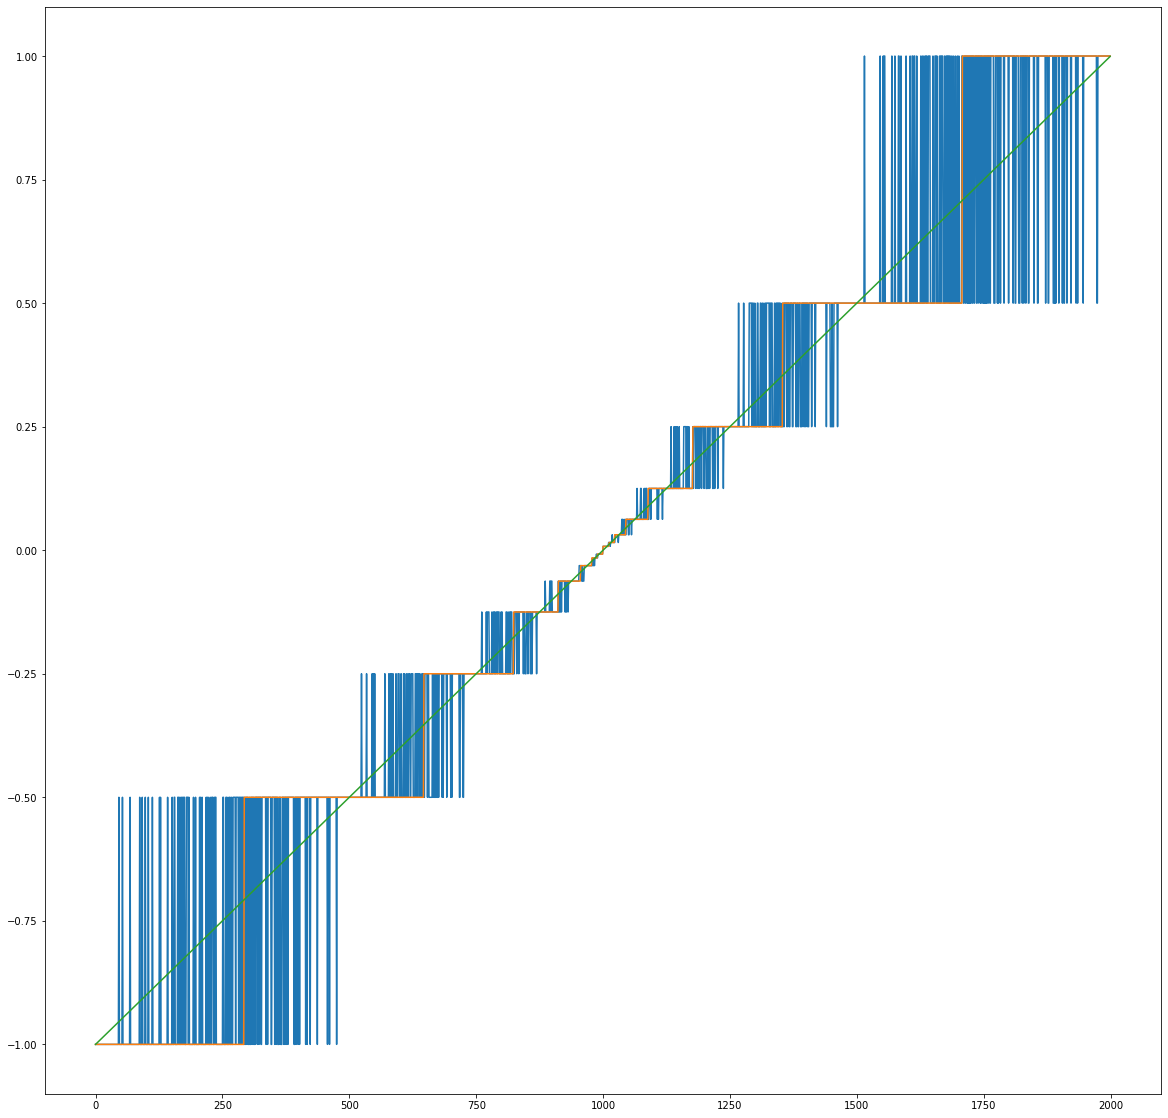

In [33]:
plt.figure(figsize=(20,20))
plt.plot(sx4_values)
plt.plot(sx4_round_values)
plt.plot(float_values)
plt.show()